#  제2장

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from matplotlib import font_manager, rc
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np

###한글 폰트###
rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


In [14]:
import scipy.stats as stats

In [2]:
df = pd.read_csv('house_price1.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung
0,0,2021,6,1,150000,1988,방배동,방배임광,82.34,11650,24.726727,6066.310420
1,1,2021,6,1,155000,2003,방배동,삼환나띠르빌(1002-9),148.99,11650,44.741742,3464.326465
2,2,2021,6,2,290000,1983,방배동,방배신삼호,185.46,11650,55.693694,5207.052734
3,3,2021,6,2,210000,2006,방배동,롯데캐슬헤론,169.08,11650,50.774775,4135.911994
4,4,2021,6,2,175000,1992,방배동,대우(효령),84.91,11650,25.498498,6863.149217


In [4]:
df = df.drop('Unnamed: 0', axis=1) # 1 column, 0 row

In [5]:
df['price_pyung'] = df['price']/df['size_pyung']

In [6]:
df1 = df.loc[df['dong_name'].isin(["잠원동"])]

In [7]:
df1.head()

,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung
66,2021,6,1,197941,2000,잠원동,노블레스,152.01,11650,45.648649,4336.185317
67,2021,6,1,215000,2000,잠원동,노블레스,152.01,11650,45.648649,4709.887507
68,2021,6,1,163000,1985,잠원동,신반포27,53.46,11650,16.054054,10153.198653
69,2021,6,2,249000,1981,잠원동,신반포10,76.32,11650,22.918919,10864.386792
70,2021,6,2,249000,1981,잠원동,신반포10,76.32,11650,22.918919,10864.386792


In [8]:
x = df1['price_pyung']

In [9]:
mu = np.mean(x)
sigma = np.std(x)

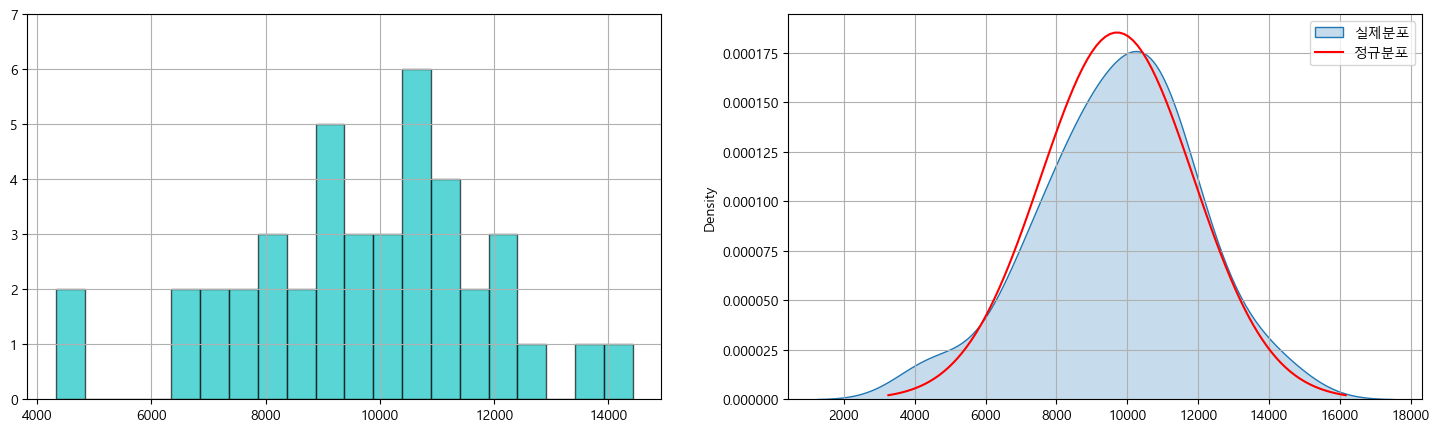

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

np.random.seed(6789)

ax[0].hist(x, bins=20, color='c', edgecolor='k', alpha=0.65)
ax[0].set_ylim(0, 7)
ax[0].grid()

x1 = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.kdeplot(df1['price_pyung'], shade=True, label='실제분포', ax=ax[1]) 
ax[1].plot(x1, stats.norm.pdf(x1, mu, sigma), color='red', label="정규분포")

ax[1].grid()
ax[1].legend()
ax[1].set_xlabel("")
plt.savefig("히스토그램_잠원동.png", dpi=150, bbox_inches='tight')
plt.show()